In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df = pd.read_csv(r"/home/atiksh/Desktop/Coding/deep-learning-tensorflow/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv")

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

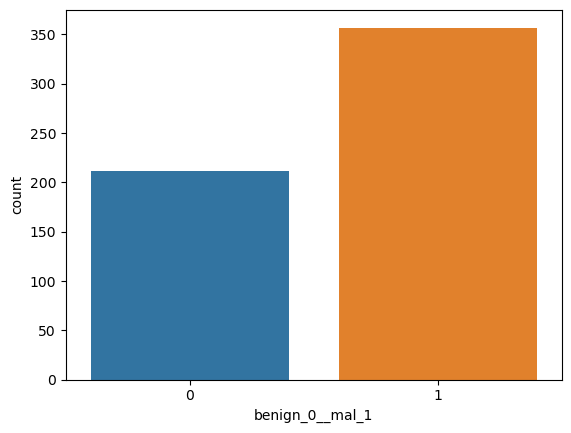

In [9]:
sns.countplot(data=df, x="benign_0__mal_1")

<Axes: >

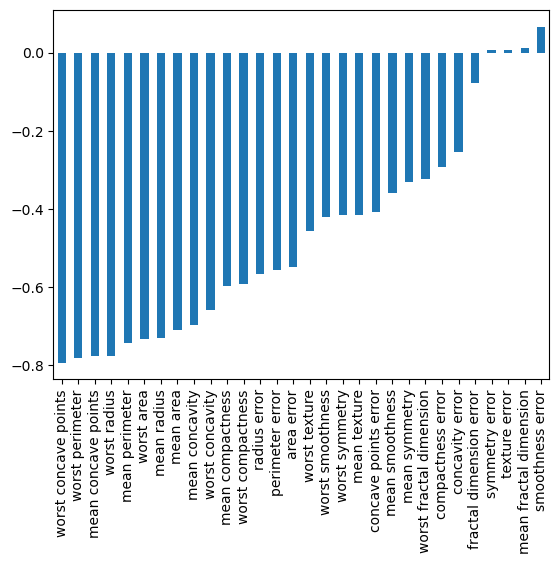

In [10]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

In [11]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [21]:
y_test.shape

(143,)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras

In [99]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))

# BINARY CLASSIFICATION _ SIGMOID
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [100]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test ))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6646 - val_loss: 0.6308
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6178 - val_loss: 0.5932
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5773 - val_loss: 0.5515
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5364 - val_loss: 0.5068
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4921 - val_loss: 0.4632
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4485 - val_loss: 0.4170
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4048 - val_loss: 0.3742
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3679 - val_loss: 0.3368
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3351 - val_loss: 0.3057
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3063 - val_loss: 0.2774
Epoch 11

In [101]:
losses = pd.DataFrame(model.history.history)

<Axes: >

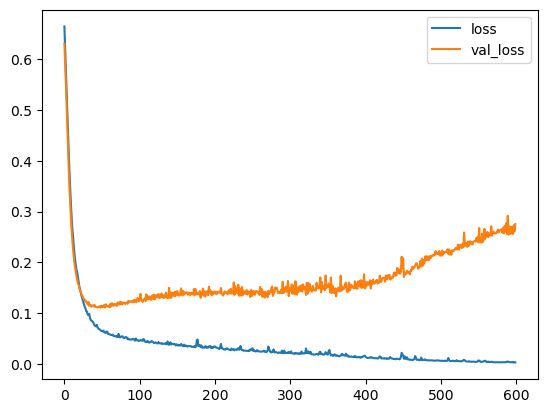

In [102]:
losses.plot()

In [117]:
model2 = Sequential()

model2.add(Dense(30, activation="relu"))
model2.add(Dense(15, activation="relu"))

# BINARY CLASSIFICATION _ SIGMOID
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam")

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [120]:
model2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7106 - val_loss: 0.6773
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6493 - val_loss: 0.6239
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6014 - val_loss: 0.5809
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5550 - val_loss: 0.5323
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5049 - val_loss: 0.4841
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4554 - val_loss: 0.4322
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4073 - val_loss: 0.3771
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3548 - val_loss: 0.3257
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3099 - val_loss: 0.2891
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2753 - val_loss: 0.2582
Epoch 11

In [121]:
losses = pd.DataFrame(model2.history.history)

<Axes: >

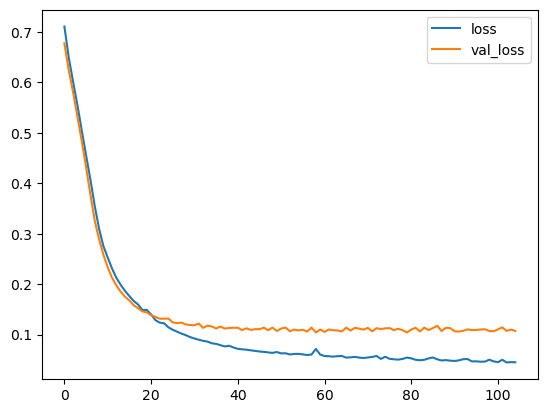

In [122]:
losses.plot

In [149]:
from tensorflow.keras.layers import Dropout

In [150]:


model3 = Sequential()

model3.add(Dense(30, activation="relu"))
model3.add(Dropout(0.5))

model3.add(Dense(15, activation="relu"))
model3.add(Dropout(0.5)
           )
# BINARY CLASSIFICATION _ SIGMOID
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer="adam")

In [151]:
model3.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test ), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6990 - val_loss: 0.6791
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6943 - val_loss: 0.6683
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6802 - val_loss: 0.6565
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6656 - val_loss: 0.6395
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6442 - val_loss: 0.6162
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6359 - val_loss: 0.5936
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6086 - val_loss: 0.5730
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6006 - val_loss: 0.5526
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5718 - val_loss: 0.5266
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5638 - val_loss: 0.5012
Epoch 11/

In [152]:
losses = pd.DataFrame(model3.history.history)

<Axes: >

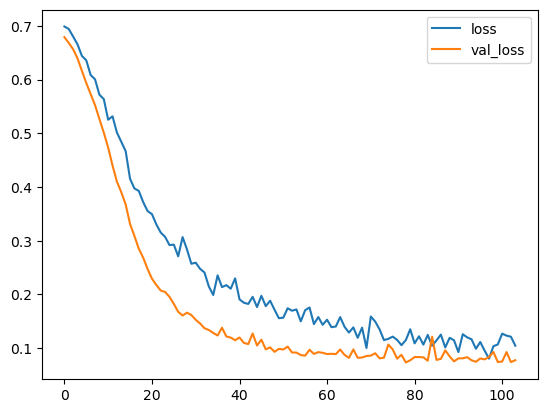

In [153]:
losses.plot()

In [154]:
predictions = np.argmax(model3.predict(X_test), axis=1)

5/5 [==============================] - 0s 1ms/step


In [155]:
from sklearn.metrics import classification_report, confusion_matrix

In [158]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



c:\Users\Atiksh\miniconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Atiksh\miniconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Atiksh\miniconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
print(confusion_matrix(y_test, predictions))

[[55  0]
 [88  0]]
